In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from single_population_discrete import SinglePopulationDiscrete
from aux import subplots1D

%load_ext autoreload

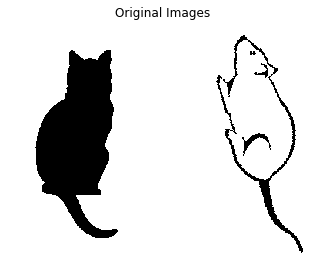

In [2]:
# Load raw images
img1 = (mpimg.imread('img/cat3.png')[:,:,0] > 0.5).astype(int)
img2 = (mpimg.imread('img/mouse3.png')[:,:,0] > 0.5).astype(int)
# img1 = mpimg.imread('img/cat2.png')
# img2 = mpimg.imread('img/rat2.png')

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(img1, cmap='gray')
axis[1].imshow(img2, cmap='gray')
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images');

In [3]:
############################################
# Initialize a network with sparse connectivity
############################################
N_EXC = img1.shape[0] * img1.shape[1]
N_INH = int(N_EXC / 5)
print('Number of neurons is', [N_EXC, N_INH])

param = {
    'N_EXC' : N_EXC,
    'N_INH' : N_INH,

    'T_RANGE_EXC' : [0.0, 1.0],
    'T_RANGE_INH' : [0.0, 1.0],
    'W_RANGE_EXC' : [0.0, 1.0],
    'W_RANGE_INH' : [-5.0, 0.0],
    
    'P_CONN'      : [0.1, 0.1, 0.1, 0.1],
    
    'SP_RATE'     : [0.01, 0.0, 0.0, 0.0],

    'WITH_SYNAPSES' : True,
    'WITH_SOMATIC_PL' : False,
    'WITH_INIT_NORM_INP' : False
}

spd1 = SinglePopulationDiscrete(param)

Number of neurons is [55204, 11040]


MemoryError: 

In [ ]:
############################################
# Run the network with no input, only noise
############################################
VI_MAT_NOISE = np.zeros((400, N_NEURON))

param_sim_noise = {
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'NOISE_MAG_EXC' : 0.5,
    'NOISE_MAG_INH' : 0.5
}

spd1.run(VI_MAT_NOISE, param_sim_noise)

# Plot network indicators
plotStruct = np.array([
    [['V_EXC', 'V_INH'], ['DV_EXC', 'DV_INH']],
    [['T_EXC', 'T_INH'], ['DT_EXC', 'DT_INH']],
    [['W_EE', 'W_EI', 'W_IE', 'W_II'],
    ['W_EE', 'W_EI', 'W_IE', 'W_II']]])

subplots1D(spd1.statsDict, plotStruct)

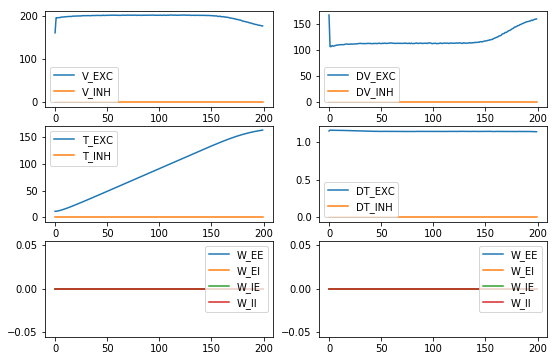

In [4]:
############################################
# Run the network by feeding in the cat 100 times
############################################
VI_MAT_CAT = np.tile(np.ndarray.flatten(img1), (200, 1))

param_sim_img = {
    'WITH_IP'       : True,
    'WITH_SP'       : False,
    'NOISE_MAG_EXC' : 0.1,
    'NOISE_MAG_INH' : 0.1
}

spd1.run(VI_MAT_CAT, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

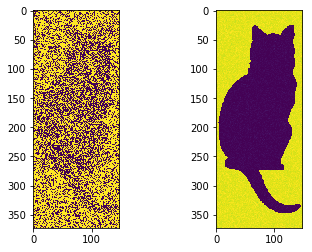

In [5]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()

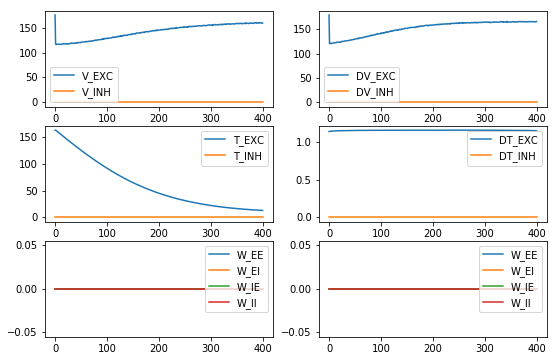

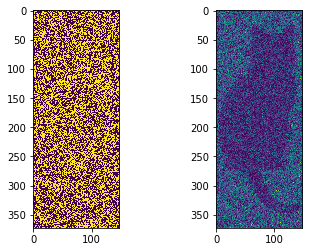

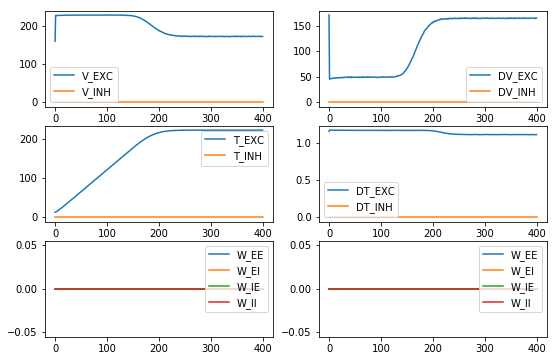

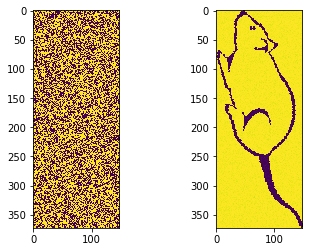

In [6]:
############################################
# Show more noise, then show more 
############################################

VI_MAT_MOUSE = np.tile(np.ndarray.flatten(img2), (400, 1))

spd1.run(VI_MAT_NOISE, param_sim_noise)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()

spd1.run(VI_MAT_MOUSE, param_sim_img)

subplots1D(spd1.statsDict, plotStruct)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(spd1.V.reshape(img1.shape))
ax[1].imshow(spd1.T.reshape(img1.shape))
plt.show()